In [1]:
import Bio
from Bio import Entrez
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
Entrez.email = "acarcione@luc.edu" #input your own luc.edu 
import os
os.getcwd()
os.chdir("C:\\Users\\acarc\\OneDrive\\Desktop") #put your own directory, i chose my desktop

In [2]:
term_search = 'fish AND col2a1b' #feel free to change the term and protein, make sure to add "AND" in between them
#for the organisms i suggest specific animals, or vertebrates. Too specific searches wont yeild any results
num_seq_wanted = 12  #feel free to change the number here as well. must be an integer. i suggest doing less than 20
type_seq_wanted = 'protein' #hypothetically my code does run DNA as well (i will be using this in my own research) but its too much for jupyter to handle

In [5]:
#all if this coding content i got from old sequencing codes i used in BIOI 388 
handle = Entrez.esearch(db= type_seq_wanted, #database will search for protein
    datetype="pdat", #type of date = publication date
    idtype="acc", #will return protein accession numbers 
    mindate="2000/01/01", #getting entries with publication date (pdat) no earlier than this
    maxdate="2024/05/03", #retrieve entries with publication date (pdat) no later than this
    term= term_search #terms to look for (terms that you would paste on NCBI seach bar)
    )
record = Entrez.read(handle)
record["Count"] # number of entries matchin the criteria set
record["IdList"] # Ids of these entries

proteinIDs = record["IdList"][:num_seq_wanted]

#create an access to genbank to access the sequence of two proteins. Fasta is a sequence format
handle = Entrez.efetch(db= type_seq_wanted, id= proteinIDs, rettype="fasta")

records = SeqIO.parse(handle, "fasta") 

all_protein_seqs = []
for number, record in enumerate(records, 1):
    description_parts = record.description.split("[")
    organism = description_parts[-1].replace("]", "") #identifies the organism because it is always in the same place in "records"
    print(f"{type_seq_wanted} #{number} is from {organism} and the {type_seq_wanted} ID is {record.id}.") 
    print()
    #print(f"Protein #{number}'s protein sequence is {record.seq}.")
    all_protein_seqs.append(str(record.seq))

protein #1 is from Anguilla rostrata and the protein ID is XP_064160443.1.

protein #2 is from Anguilla rostrata and the protein ID is XP_064160442.1.

protein #3 is from Eleginops maclovinus and the protein ID is XP_063766933.1.

protein #4 is from Pelmatolapia mariae and the protein ID is XP_063329456.1.

protein #5 is from Danio rerio and the protein ID is NP_001268407.1.

protein #6 is from Engraulis encrasicolus and the protein ID is XP_063072309.1.

protein #7 is from Trichomycterus rosablanca and the protein ID is XP_062842626.1.

protein #8 is from Trichomycterus rosablanca and the protein ID is XP_062842625.1.

protein #9 is from Pungitius pungitius and the protein ID is XP_062419997.1.

protein #10 is from Sardina pilchardus and the protein ID is XP_062400935.1.

protein #11 is from Osmerus eperlanus and the protein ID is XP_062326535.1.

protein #12 is from Scomber scombrus and the protein ID is XP_062271603.1.



In [6]:
with open('try4.txt', 'w') as seqs:
    for i, sequence in enumerate(all_protein_seqs, start= 1):
        seqs.write(f'>Seq_#{i}\n{sequence}\n')

In [7]:
for sequence in all_protein_seqs:
    shortest_seq = min(all_protein_seqs, key= len)
    print(f'The shortest sequence is "{shortest_seq}". It has a length of {len(shortest_seq)}.')
    longest_seq = max(all_protein_seqs, key= len)
    print()
    print(f'The longest conserved sequence is "{longest_seq}". It has a length of {len(longest_seq)} amino acids.')
    break

The shortest sequence is "MFSFMDSRTVLLLVATHVCLLAVVRCQEDDRSPGAKGQKGEPGDITDVVGPRGPSGPMGPPGEQGPRGLRGDKGEKGSLGPRGRDGEPGTPGNPGPPGPPGPNGPPGLGGNFAAQMAGGFDEKAGGAQMGVMQGPMGPMGPRGPPGPSGSPGPQGFQGNPGEAGEPGQSGPMGPRGPPGPSGKPGDDGEAGKPGKPGDRGPSGPQGARGFPGTPGLPGIKGHRGYPGLDGSKGETGSLGSKGESGAPGENGAPGPMGPRGLPGERGRPGSSGVAGARGNDGLPGPAGPPGPVGPSGAPGFPGSPGSKGEAGPTGARGPEGAQGPRGESGTPGSSGPSGASGNPGTDGIPGSKGSAGAPGIAGAPGFPGPRGPPGPQGATGPLGPKGTSGDPGIPGFKGEAGPKGEFGPVGMQGITGPQGEEGKRGPRGEAGAAGPLGPPGERGTPGNRGFPGQDGLAGPKGAPGERGPSGASGPKGANGDPGRPGEAGLLGARGLTGRPGDAGPQGKVGPSGGSGEDGRPGPPGPQGARGQPGVMGFPGPKGATGEPGKSGEKGLGGAPGLRGLPGKDGETGPSGPPGPAGPAGERGEQGQPGPSGFQGLPGPPGPPGEGGKPGDQGVPGEGGAAGATGPRGERGFPGERGAAGSQGLQGPRGLPGTPGTDGPKGAIGPGGAGGAQGPPGLQGMPGERGGAGVPGPKGDRGDLGEKGPEGASGKDGGRGLTGPIGPPGPGGPNGEKGESGPAGPSGAPGTRGTPGDRGETGPPGPAGFAGPPGSDGQPGIKGEQGESGQKGDAGAPGPQGPSGAPGPAGPTGVFGPKGARGAQGPSGATGFPGAAGRVGPPGPNGNPGPAGPAGPAGKDGPKGVRGDNGPMGRQGDAGLRGPAGTPGEKGDAGEDGPPGPLGPSGPQGLGGQRGIVGLPGQRGERGFPGLPGPSGEPGKQGAPGGSGDRGPPGPVGPPGLTGPAGEPGREGNAG

In [8]:
with open('proteins.fasta', 'w') as seqs: #this writes a fasta file with the sequences
    for i, sequence in enumerate(all_protein_seqs, start= 1): #this goes through the sequences assigning them numbers starting from 1
        longest_seq = max(all_protein_seqs, key= len) #this is assigning the longest sequence based on length
        all_proteins_same_len = sequence.ljust(len(longest_seq), '-') #this makes all the other sequences the same length as the longest one to prep for multiple sequence alignment
        seqs.write(f'>Seq_#{i}\n{all_proteins_same_len}\n') #this is how the sequences will be written into the fasta file. fasta files always have a '>' as a delimiter

from Bio import AlignIO #this is the module necessary for this step
with open("proteins.fasta") as aminos_file: #this opens the file
    aa_file = [] #making a list to make sure the sequences seperate correctly
    aa_seqs = list(SeqIO.parse(aminos_file, "fasta")) #parsing the sequnces out 
    aa_file.append(aa_seqs) #then appending the sequences to a list. This code segement was more for testing to make sure everything was written correctly

In [9]:
from Bio import AlignIO #this is the module necessary for this step
msa = AlignIO.read('proteins.fasta', 'fasta') #this is creating a multiple sequence alignment of all the sequences 
#alignIO aligns the sequences as they are, but aligns them using their delimiter '>' this makes it easier and allows alignIO to recognize the sequences

In [10]:
with open("originalmsa.aln", "w") as file: #then we write a special file known as '.aln' this is the only way i could make a tree from my MSA
    AlignIO.write(msa, file, 'clustal') #its writing it in and writing it in clustal format, i prefer this format becasue its more organised
    #you could use other formats if you are interested

with open("originalmsa.aln", 'r') as aln: # this reads the alignment and prepares it for phylogenetic tree building! 
    alignment = AlignIO.read(aln, "clustal") #reading it in clustal format as well

In [11]:
print(type(alignment)) #this is more of a check code, just to see that it is a MSA and it has been aligned
print(alignment) #we can already see some regions that line up!! however, we want to see the whole alignment for in depth analysis

<class 'Bio.Align.MultipleSeqAlignment'>
Alignment with 12 rows and 1493 columns
MFSFVDSRTLLLLVATQVVLLALVKCQEEDDRPAGAKGQKGEPG...--- Seq_#1
MFSFVDSRTLLLLVATQVVLLALVKCQEEDDQEPGSCVQEGQRY...--- Seq_#2
MFSIMDSRTVLLLVATQACLLAVVRCQEEDQEDVLSCLQDGQRY...--- Seq_#3
MFSFMDSRTILLLVASQVCLLAVVRCQVEDDQEDAFSCVQDGQR...L-- Seq_#4
MMKTSMMVRSAELLLCVAALGALLTGGAAQDEEQDPGGCSQDGQ...CFL Seq_#5
MFSFMDSRTLLLLVATQVALLAVVRCQDDQDDPGSCSQDGSRYN...--- Seq_#6
MPRYLDSKTVLIYVATLILVLANVNGQDEDDLEPGSCTHDGQHY...--- Seq_#7
MPRYLDSKTVLIYVATLILVLANVNGQDEDDLEPGSCTHDGQHY...--- Seq_#8
MFSFMDSRTVLLLVATHVCLLAVVRCQEDDRSPGAKGQKGEPGD...--- Seq_#9
MSVASTISMTRSDRCRSWLAQTCPERWRTEEDPGSCLQEGSRYN...--- Seq_#10
MFSFVDSRTVLLLVATQVVLLAVVKCQEEDDQDAFSCIQDGQKY...--- Seq_#11
MFSIMDSRTLLLLVATQVCLLAVVRCQEDDQEDAFTCIQDGQRY...--- Seq_#12


In [12]:
with open("output_alignment.txt", "w") as out: #this file is just so we can see the WHOLE alignment in the next cell. writing similar to previous cells
    AlignIO.write([alignment], out, "clustal")

In [13]:
with open("output_alignment.txt", "r") as file: #this code will print the entire sequence alignment! it will also be in the file if you needed to keep it
    contents = file.read()
    print(contents) 
#giant output! very interesting lineups. regions conserved have been conserved for a region and are a major region of interest for bioinformaticians like me!

CLUSTAL X (1.81) multiple sequence alignment


Seq_#1                              MFSFVDSRTLLLLVATQVVLLALVKCQEEDDRPAGAKGQKGEPGDITDVV
Seq_#2                              MFSFVDSRTLLLLVATQVVLLALVKCQEEDDQEPGSCVQEGQRYSDKDVW
Seq_#3                              MFSIMDSRTVLLLVATQACLLAVVRCQEEDQEDVLSCLQDGQRYSDKDVW
Seq_#4                              MFSFMDSRTILLLVASQVCLLAVVRCQVEDDQEDAFSCVQDGQRYSDKDV
Seq_#5                              MMKTSMMVRSAELLLCVAALGALLTGGAAQDEEQDPGGCSQDGQLYRDKD
Seq_#6                              MFSFMDSRTLLLLVATQVALLAVVRCQDDQDDPGSCSQDGSRYNDKDVWK
Seq_#7                              MPRYLDSKTVLIYVATLILVLANVNGQDEDDLEPGSCTHDGQHYSDKNVW
Seq_#8                              MPRYLDSKTVLIYVATLILVLANVNGQDEDDLEPGSCTHDGQHYSDKNVW
Seq_#9                              MFSFMDSRTVLLLVATHVCLLAVVRCQEDDRSPGAKGQKGEPGDITDVVG
Seq_#10                             MSVASTISMTRSDRCRSWLAQTCPERWRTEEDPGSCLQEGSRYNDKDVWK
Seq_#11                             MFSFVDSRTVLLLVATQVVLLAVVKCQEEDDQDAFSCIQDGQKYSDK

In [14]:
#phylogenetic tree building
from Bio.Phylo.TreeConstruction import DistanceCalculator #module from biophylo to measure the differences (distance) between sequences
calculate = DistanceCalculator("identity") #calculates this distance based on 'identity'. identity == matching amino acids
print(calculate)

distance_matrix = calculate.get_distance(alignment) #this calculates the distances in our alignment!
print(distance_matrix)

from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor #now its constructing the distance tree based on our distance calculations
constructor = DistanceTreeConstructor(calculate)

tree = constructor.build_tree(alignment) #this is the tree being constructed (will look like an outline of the clades at first) 
tree.rooted = True #we want a rooted tree, so we can look at evolutionary relationships. unrotted shows similarity relationships only. feel free to try  
print(tree)

Seq_#1  0.000000
Seq_#2  0.675151    0.000000
Seq_#3  0.679169    0.103148    0.000000
Seq_#4  0.929002    0.932351    0.939049    0.000000
Seq_#5  0.693235    0.663094    0.666443    0.939719    0.000000
Seq_#6  0.662425    0.616209    0.614869    0.935030    0.675820    0.000000
Seq_#7  0.929672    0.904220    0.908238    0.679169    0.947756    0.935030    0.000000
Seq_#8  0.922974    0.867381    0.864702    0.942398    0.926993    0.890154    0.889484    0.000000
Seq_#9  0.889484    0.925653    0.927662    0.931681    0.944407    0.911587    0.921634    0.703282    0.000000
Seq_#10 0.947086    0.949766    0.951775    0.935700    0.949766    0.896182    0.899531    0.267247    0.688547    0.000000
Seq_#11 0.671802    0.087073    0.088413    0.936370    0.665774    0.615539    0.910248    0.864032    0.923644    0.945747    0.000000
Seq_#12 0.673141    0.103818    0.060281    0.941058    0.667783    0.614200    0.910248    0.869390    0.928332    0.947756    0.087743    0.000000
    

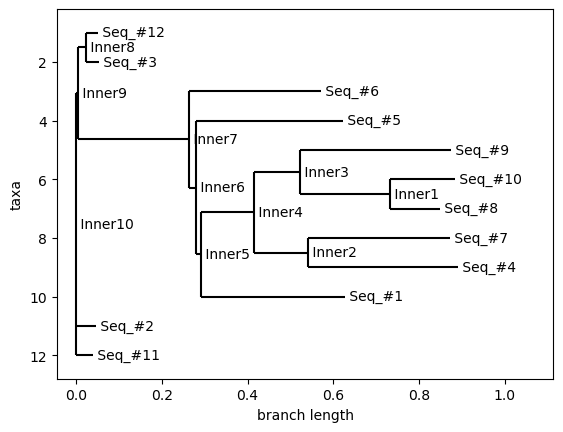

In [15]:
Phylo.write(tree, "tree.xml", "phyloxml")

import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(tree) #uses matplotlib to plot the tree!

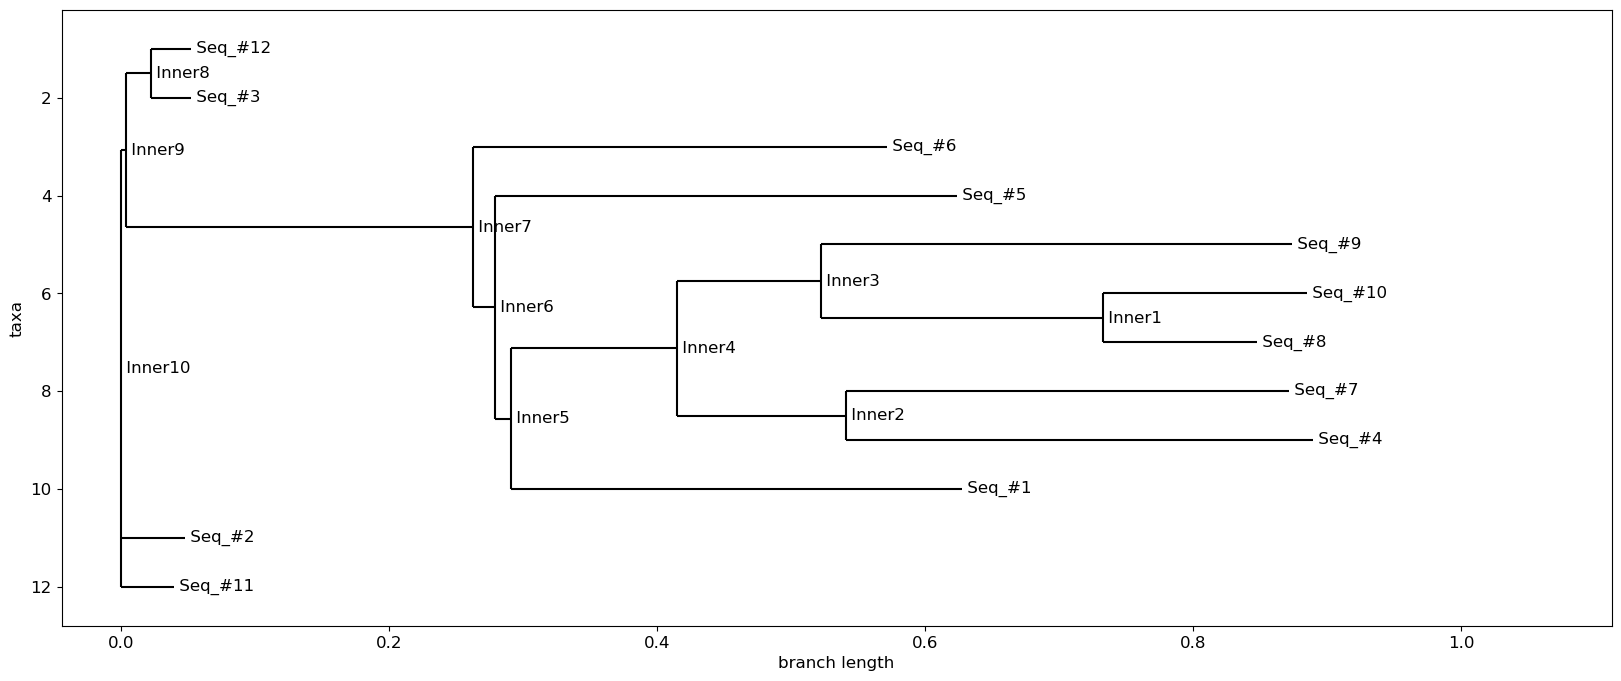

In [16]:
#this just edits the dimension of the previous plot for better visualization
fig = plt.figure(figsize= (20, 8), dpi= 100)
matplotlib.rc('font', size= 12)
matplotlib.rc('xtick', labelsize= 12)
matplotlib.rc('ytick', labelsize= 12)
axes = fig.add_subplot(1, 1, 1)

Phylo.draw(tree, axes= axes)
plt.show()
#branch length represents descendants of a shared ancestor represented by 'inner'
# sequences on the same clade (share an inner) are closely related and share an ancestor. 
#branch length also shows time, so the longer they are the more conserved their sequences have been 

In [17]:
#now for pairwise alignments! this helps researchers look for specific changes in the amino acid
#this is important after looking at the pylogenetic tree, if you want to see where 2 highly similar sequences differ
## Pairwise alignments
import Bio
from Bio import Align #package for alignments
from Bio.Seq import Seq #working with seq objects
from Bio.Align import MultipleSeqAlignment

aligner = Align.PairwiseAligner() #align has module pairwise aligner that looks at 2 sequences at a time
aligner.mode = 'local' #global (does the whole sequence) or local (only does the parts of the sequence that are similar.)
aligner.match_score = 1.0 #setting the match score
aligner.mismatch_score = -2.0 #setting the mismatch penalty
aligner.gap_score = -2.5 #setting gap penalty

In [18]:
for record in msa:
    record.seq = Seq(str(record.seq).replace("-", "")) #removing the dash because it is not necessary for pairwise and could acutally affect alignments

In [19]:
protein_alignments = []
for i in range(len(msa)): #this is the core of the alignments. it looks at the same sequences, without the dash 
    for j in range(i + 1, len(msa)): #this looks at each one so its not aligning sequence 1 against itself
        if i != j: #this makes sure that its not aligning sequence one against itself either
            alignment = aligner.align(msa[i], msa[j]) #aligns them!
            protein_alignments.append(alignment) #adds to the list the alignments for storage and later viewing


In [20]:
align_seqs= []
for alignment in protein_alignments: #this part of the code prints the score (score = how many amino acids match up) and prints the alignment
    for pair in alignment: 
        if alignment.score <= len(shortest_seq): #because some proteins may be identical and thats not interesting
            print(f"This alignment's alignment score is: {alignment.score} \n {pair}")
            align_seqs.append(pair)
            break
# | = match, . = mismatch, - = empty

This alignment's alignment score is: 1389.0 
 Seq_#1           32 PAGAKGQKGEPGDITDVVGPRGPAGPMGPPGEQGQRGDRGDKGERGSPGPRGRDGEPGTP
                  0 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Seq_#2          101 PAGAKGQKGEPGDITDVVGPRGPAGPMGPPGEQGQRGDRGDKGERGSPGPRGRDGEPGTP

Seq_#1           92 GNPGPPGPPGPNGPPGLGGNFAAQMTGGFDEKAGGAQMGVMQGPMGPMGPRGPPGPTGAP
                 60 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Seq_#2          161 GNPGPPGPPGPNGPPGLGGNFAAQMTGGFDEKAGGAQMGVMQGPMGPMGPRGPPGPTGAP

Seq_#1          152 GPQGFQGNPGEAGEPGTSGPMGPRGPPGPSGKPGDDGEAGKPGKGGERGPPGPQGARGFP
                120 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Seq_#2          221 GPQGFQGNPGEAGEPGTSGPMGPRGPPGPSGKPGDDGEAGKPGKGGERGPPGPQGARGFP

Seq_#1          212 GTPGLPGIKGHRGYPGLDGGKGEAGAAGSKGEAGSSGESGAPGPMGPRGLPGERGRPGPS
                180 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Seq_#2          281 GTPGLPGIKGHRGYPGLDGGKGEAGAAGSKGEAGSSGESG

In [21]:
#optional if you need more data!
for sequence in msa: #measure length again 
    longest_seq = max(msa, key= len)
    print(f'The longest conserved sequence is "{longest_seq}". It has a length of {len(longest_seq)} amino acids.')
    shortest_seq = min(msa, key= len)
    print(f'The shortest sequence is "{shortest_seq}". It has a length of {len(shortest_seq)} amino acids.')
    break

The longest conserved sequence is "ID: Seq_#5
Name: Seq_#5
Description: Seq_#5
Number of features: 0
Seq('MMKTSMMVRSAELLLCVAALGALLTGGAAQDEEQDPGGCSQDGQLYRDKDVWKP...CFL')". It has a length of 1493 amino acids.
The shortest sequence is "ID: Seq_#9
Name: Seq_#9
Description: Seq_#9
Number of features: 0
Seq('MFSFMDSRTVLLLVATHVCLLAVVRCQEDDRSPGAKGQKGEPGDITDVVGPRGP...CFL')". It has a length of 1420 amino acids.


In [22]:
print(proteinIDs)

blasting_this = proteinIDs[9]#to look for other similar amino acids we were able to align
#you should choose any number you want based on my phylotree i chose #10!!
print(blasting_this)

['XP_064160443.1', 'XP_064160442.1', 'XP_063766933.1', 'XP_063329456.1', 'NP_001268407.1', 'XP_063072309.1', 'XP_062842626.1', 'XP_062842625.1', 'XP_062419997.1', 'XP_062400935.1', 'XP_062326535.1', 'XP_062271603.1']
XP_062400935.1


In [23]:
#THIS TAKES A WHILE TO RUN!! 
import Bio
from Bio.Blast import NCBIWWW

result_handle = NCBIWWW.qblast("blastp", "refseq_protein", blasting_this) 
#you can change tblastn to blastn if you have prot sequence looking for nuc, blastp if you have a protein looking for protein
# or blastx if you have nucleotide looking for protein, tblastn if you have protein looking for nucleotide and others
#you can also change the data base from nr (non redundant protein seqs), to nt (non redundant nucleotide), to ref_seq(protein), and many others

result_handle #some searches may not go through if they are too specific or if you are using the wrong search type and database

In [24]:
from Bio.Blast import NCBIXML
blast_record = NCBIXML.read(result_handle)

In [26]:
for alignment in blast_record.alignments: #results of the BLAST search 
    print("new protein found:", alignment.title) #gives the title 
    print("ID:", alignment) #and the name of the protein it found

new protein found: ref|XP_048110154.1| collagen, type II, alpha 1b isoform X1 [Alosa alosa]
ID: ref|XP_048110154.1| collagen, type II, alpha 1b isoform X1 [Alosa alosa]
           Length = 1491

new protein found: ref|XP_041945140.1| collagen, type II, alpha 1b isoform X1 [Alosa sapidissima]
ID: ref|XP_041945140.1| collagen, type II, alpha 1b isoform X1 [Alosa sapidissima]
           Length = 1491

new protein found: ref|XP_048110155.1| collagen, type II, alpha 1b isoform X2 [Alosa alosa]
ID: ref|XP_048110155.1| collagen, type II, alpha 1b isoform X2 [Alosa alosa]
           Length = 1421

new protein found: ref|XP_041945141.1| collagen, type II, alpha 1b isoform X2 [Alosa sapidissima]
ID: ref|XP_041945141.1| collagen, type II, alpha 1b isoform X2 [Alosa sapidissima]
           Length = 1421

new protein found: ref|XP_028855184.1| collagen alpha-1(II) chain isoform X1 [Denticeps clupeoides]
ID: ref|XP_028855184.1| collagen alpha-1(II) chain isoform X1 [Denticeps clupeoides]
           